# Exploration des données

Dans ce notebook, nous proposons simplement d'explorer les données du cours afin d'explorer leur structure et de nous familiariser avec la bibliothèque [pandas](https://pandas.pydata.org/). Nous commençons par le jeu de données "Sciences du climat".

## Sciences du climat

Pour commencer, il nous faut "importer" la bibliothèque pandas (import).
Une fois ceci fait, nous pouvons lire la table (*dataframe*) référençant les articles de la base de données. Puis nous affichons les cinq premières entrées:

In [19]:
import pandas as pd

articles = pd.read_parquet("science/climate/articles.parquet")
articles.head(5)

,title,publication_year,domain,field,subfield,domains,fields,subfields,url,pdf,language,source
article_id,,,,,,,,,,,,
4393546166,Data Clain et al. - Supporting the uncertainty...,2022,2,20,2002,"b'[""2"",""3"",""2""]'","b'[""20"",""26"",""18""]'","b'[""2002"",""2613"",""1803""]'",,,en,https://openalex.org/S4306400562
4393714386,Data Clain et al. - Supporting the uncertainty...,2022,2,20,2002,"b'[""2"",""3"",""2""]'","b'[""20"",""26"",""18""]'","b'[""2002"",""2613"",""1803""]'",,,en,https://openalex.org/S4306400562
4220805390,Evaluating urban risks in Europe using publicl...,2022,3,23,2306,"b'[""3"",""3""]'","b'[""23"",""23""]'","b'[""2306"",""2306""]'",,,en,None
4220871093,Carbon Footprint Assessment for Decarbonisatio...,2022,3,23,2306,"b'[""3"",""2"",""3""]'","b'[""23"",""20"",""23""]'","b'[""2306"",""2002"",""2306""]'",,,en,None
4224019370,The future cryosphere: Impacts of global warming,2022,3,23,2306,"b'[""3"",""3"",""3""]'","b'[""23"",""22"",""23""]'","b'[""2306"",""2202"",""2306""]'",,,en,https://openalex.org/S4306462995


## Composition des dataframes pandas

Un dataframe est composé de lignes (ici, une par article), de colonnes (title, publication_year, etc.), et d'un index (article_id).
L'index est un identifiant unique associé à chaque ligne. 

Pour accéder à une colonne en particulier (par exemple, l'année de publication), utilise la syntaxe suivante:

In [20]:
articles["publication_year"]

article_id
4393546166    2022
4393714386    2022
4220805390    2022
4220871093    2022
4224019370    2022
              ... 
4386855500    2023
4389633312    2023
4389862110    2023
4389881210    2023
4390419499    2023
Name: publication_year, Length: 231101, dtype: int64

## Explorer un jeu de données

Une des premières étapes suivant la collecte d'un jeu de données est son exploration préliminaire, afin d'en comprendre les caractéristiques et éventuellement de repérer des erreurs. Par exemple, explorons le nombre de publications par année. Pour cela, nous utilisons la fonctionnalité `groupby()` (qui regroupe les entrées selon leur valeur pour une certaine colonne, en l'occurrence `publication_year`), et la fonction `count()`, qui compte le nombre d'entrées non-nulles au sein de chaque groupe et pour chaque colonne:



In [21]:
articles.groupby("publication_year").count()

,title,domain,field,subfield,domains,fields,subfields,url,pdf,language,source
publication_year,,,,,,,,,,,
2015,15975,15996,15996,15996,15996,15996,15996,15993,13589,15996,12811
2016,16837,16858,16858,16858,16858,16858,16858,16857,13205,16858,13728
2017,16556,16586,16586,16586,16586,16586,16586,16585,13497,16586,13677
2018,18477,18711,18711,18711,18711,18711,18711,18711,15290,18711,15551
2019,21011,21107,21107,21107,21107,21107,21107,21107,16249,21107,18007
2020,25233,25309,25309,25309,25309,25309,25309,25309,19167,25309,20492
2021,29373,29451,29451,29451,29451,29451,29451,29451,22656,29451,23702
2022,28680,28744,28744,28744,28744,28744,28744,28744,22803,28744,23289
2023,31798,31873,31873,31873,31873,31873,31873,31873,24963,31873,24670


Dans ce dataframe, la colonne sur laquelle est fondée le regroupement (``publication_year'') est devenue un index.

Cette manière de visualiser les données est un peu austère. À la place, nous pouvons créer un graphique représenter le nombre d'articles publié chaque année. Pour cela, on utilise la bibliothèque matplotlib:

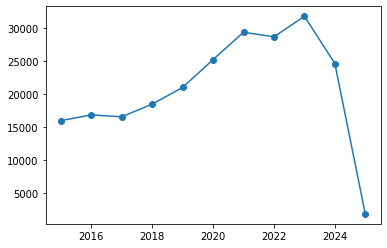

In [22]:
from matplotlib import pyplot as plt
df = articles.groupby("publication_year").count()
plt.scatter(df.index, df["title"])
plt.plot(df.index, df["title"])

Expliquons le code suivant point par point:

1. La première ligne importe la bibliothèque matplotlib
2. La seconde ligne dérive un dataframe dont chaque ligne est une année de publication et chaque colonne le nombre d'entrées non-vides appartenant à cette année.
3. La troisième ligne dessine un nuage de points, dont les abscisses contiennent l'index du dataframe (à savoir les années de publication), et les ordonnées indiquent le nombre de publications dans la base de données pourvues d'un titre pour chacune de ces années de publication.
4. Le nuage de points est relié par des segments pour améliorer la visibilité du graphique.

# Croiser des dataframes

Le répertoire `science/climate` contient plusieurs dataframes (un par fichier .parquet). Par exemple, on peut trouver un dataframe `articles_authors.parquet`:

In [38]:
articles_authors = pd.read_parquet("science/climate/articles_authors.parquet")
articles_authors.head(5)

,author_id,article_id,position
index,,,
0,5077016639,4393546166,first
1,5094330189,4393546166,middle
2,5094330190,4393546166,middle
3,5094330191,4393546166,last
4,5077016639,4393714386,first


Chaque entrée indique un auteur ou co-auteur (représenté par un identifiant unique `author_id`) associé à un article `article_id`. Par ailleurs, la colonne `position` indique la position de l'auteur dans la liste des auteurs. 

La base de données contient un autre dataframe "authors":

In [25]:
authors = pd.read_parquet("science/climate/authors.parquet")
authors.head(5)

,name,orcid,gender
author_id,,,
5077016639,A. Clain,https://orcid.org/0000-0002-5310-823X,None
5094330189,De Oliveira,None,m
5094330190,Minondo-Kaghad,None,None
5094330191,Salès-Wuillemin,None,None
5087828342,Zeting Li,https://orcid.org/0000-0001-5498-1295,None


Cette base contient l'ensemble des auteurs référencés dans le reste de la base de données. Elle comprend leur nom, leur identifiant unique, et parfois, leur genre. Regardons en particulier le nombre d'entrées en fonction de la valeur associée à la colonne gender:


In [27]:
authors.value_counts("gender", dropna=False)

gender
m         166778
f         116114
NaN        89642
unisex     10740
dtype: int64

Comme nous pouvons le voir, beaucoup de données sont manquantes. En-outre, les hommes ("m", i.e. male/masculin) sont sur-représentés.

### Fusionner des datasets

Supposons que nous voulons savoir si la position des co-auteurs dans la liste d'auteurs est associée à leur genre.
Pour cela, nous utilisons la fonction `merge()`, qui permet de croiser les lignes de deux dataframe, dès lors qu'elles partagent certaines valeurs. En particulier, nous joignons le dataframe `authors` au dataframe `articles_authors` dès lors que la valeur de la colonne "author_id" des lignes de `articles_authors` est égale à la valeur de l'index des lignes de `authors`:


In [116]:
df = articles_authors.merge(authors, left_on="author_id", right_index=True)
df.head(5)

,author_id,article_id,position,name,orcid,gender
index,,,,,,
0,5077016639,4393546166,first,A. Clain,https://orcid.org/0000-0002-5310-823X,None
4,5077016639,4393714386,first,A. Clain,https://orcid.org/0000-0002-5310-823X,None
1,5094330189,4393546166,middle,De Oliveira,None,m
5,5094330189,4393714386,middle,De Oliveira,None,m
2,5094330190,4393546166,middle,Minondo-Kaghad,None,None


Puis, nous comptons le nombre d'auteurs homme et femme pour chaque article :

In [122]:
# On classe les données par d'abord par article, puis par position des auteurs
df["author_order"] = df["position"].map({
    "first": 0,
    "middle": 1,
    "last": 2
})
df = df.sort_values(["article_id", "author_order"], ascending=True)

# On regroupe les entrées par article, en 
articles = df.groupby("article_id").agg(
    first=("gender", "first"),
    last=("gender", "last"),
    total=("author_id", "count"),
)

# On retire les articles pour lesquels le genre du premier ou dernier auteur n'est pas connu.
articles = articles[(articles["first"].isin(["f", "m"]))&(articles["last"].isin(["f", "m"]))]

# On retire les articles avec < ou > de deux auteurs:
articles = articles[articles["total"]==2]

# On compte le nombre de combinaisons (mm, ff, mf, fm)
articles.value_counts(["first", "last"])

first  last
m      m       16462
f      f        6863
       m        5389
m      f        4498
dtype: int64

On constate que pour les articles écrits par un homme et une femme, l'homme est beaucoup plus fréquemment premier-auteur.